In [7]:
import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt 
import operator
import math

In [8]:
folder = 'ml-100k/'
m_cols = ['movie_id','movie title','release date','video release date','IMDb URL'
          ,'unknown','Action','Adventure','Animation','Childrens','Comedy',
          'Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi',
        'Thriller','War','Western']
data= pd.read_csv(folder+'u.item',delimiter='|',names=m_cols,encoding='latin-1')
data.shape
np.random.seed(1002)


In [9]:
data.head()

,movie_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   movie title         1682 non-null   object 
 2   release date        1681 non-null   object 
 3   video release date  0 non-null      float64
 4   IMDb URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Childrens           1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [11]:
#number of unique movies
movies = data['movie_id'].unique().tolist()
num_items = len(movies)
num_items
movies

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [12]:
u_cols = ['user_id','age','gender','occupation','zip_code']
data_u = pd.read_csv(folder+'u.user',delimiter='|',names=u_cols,encoding='latin-1')
data_u.shape

(943, 5)

In [13]:
data_u.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [14]:
users = data_u['user_id'].unique().tolist()
num_users = len(users)
num_users

943

In [15]:
r_cols = ['user_id','movie_id','rating','timestamp']
data_r = pd.read_csv(folder+'u.data',delimiter='\t',names=r_cols,encoding='latin-1')
data_r.shape

(100000, 4)

In [16]:
data_r.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [17]:
num_ratings = data_r.shape[0]
num_ratings

100000

In [18]:
rec_matrix_size = num_users * num_items
sparsity = 1 - num_ratings / rec_matrix_size
sparsity

0.9369533063577546

In [19]:
movie_data_ratings_data=data.merge(data_r,on = 'movie_id',how = 'inner')
movie_data_ratings_data.head()
movie_data_ratings_data['user_id'] == None
movie_data_ratings_data[movie_data_ratings_data['movie_id'] == 242]
movie_data_ratings_data.shape

(100000, 27)

In [20]:
#displays high rated movies
high_rated= movie_data_ratings_data['rating']==5.0
movie_data_ratings_data[high_rated].head(10)

,movie_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_id,rating,timestamp
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,287,5,875334088
8,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,95,5,879197329
10,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,189,5,893264174
22,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,340,5,884990988
32,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,43,5,875975579
37,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,38,5,892430636
39,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,96,5,884403574
41,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,157,5,874813703
48,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,18,5,880130802
51,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,45,5,881013176


In [21]:
genres = ['unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror',
'Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
genres_count = {}
for genre in genres:
    count = 0
    genre_movies = movie_data_ratings_data[genre] == 1
    genres_count[genre] = movie_data_ratings_data[genre_movies].shape[0]

print(genres_count)
genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)
print(genres_count_list)

{'unknown': 10, 'Action': 25589, 'Adventure': 13753, 'Animation': 3605, 'Childrens': 7182, 'Comedy': 29832, 'Crime': 8055, 'Documentary': 758, 'Drama': 39895, 'Fantasy': 1352, 'Film-Noir': 1733, 'Horror': 5317, 'Musical': 4954, 'Mystery': 5245, 'Romance': 19461, 'Sci-Fi': 12730, 'Thriller': 21872, 'War': 9398, 'Western': 1854}
[('Drama', 39895), ('Comedy', 29832), ('Action', 25589), ('Thriller', 21872), ('Romance', 19461), ('Adventure', 13753), ('Sci-Fi', 12730), ('War', 9398), ('Crime', 8055), ('Childrens', 7182), ('Horror', 5317), ('Mystery', 5245), ('Musical', 4954), ('Animation', 3605), ('Western', 1854), ('Film-Noir', 1733), ('Fantasy', 1352), ('Documentary', 758), ('unknown', 10)]


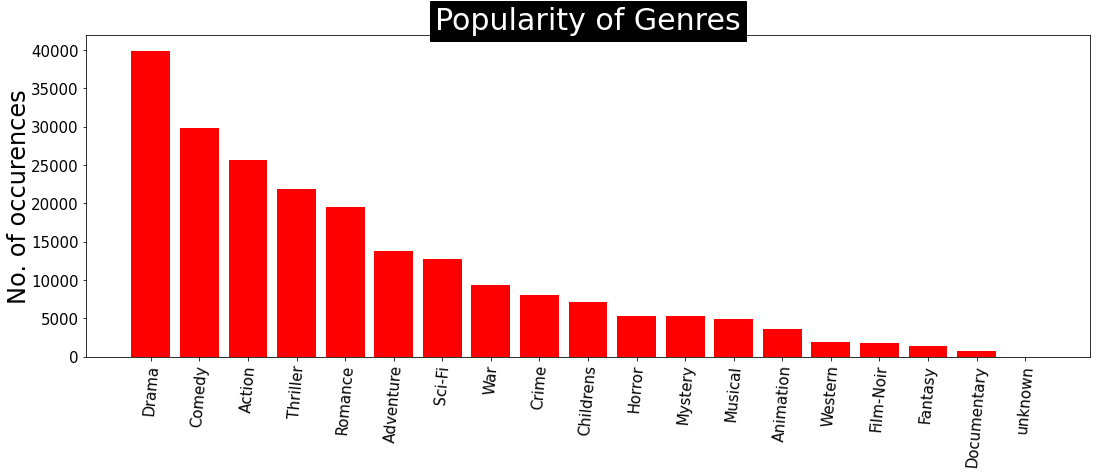

In [22]:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list]
x_axis = [i for i in range(len(genres_count))]
x_label = [genre[0] for genre in genres_count_list]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

##### So far I used Dr. Asnat Messica  to to show ditribution of high ratings per genre, and to generae the merged DF of movies + ratings

so to be specific


# QUESTION 1

### Sparsity distribution of number of ratings 

In [23]:
sparsity = 1 - num_ratings / rec_matrix_size
sparsity

0.9369533063577546

In [24]:
ratings = range(1,6)
ratings_count = {}
for r in ratings:
    count = 0
    current_rating = movie_data_ratings_data['rating'] == r
    ratings_count[r] = movie_data_ratings_data[current_rating].shape[0]

print(ratings_count)
# genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)
# print(genres_count_list)
ratings_count_list = sorted(ratings_count.items(), key=operator.itemgetter(1),reverse=True)
print(ratings_count_list)

{1: 6110, 2: 11370, 3: 27145, 4: 34174, 5: 21201}
[(4, 34174), (3, 27145), (5, 21201), (2, 11370), (1, 6110)]


### distribution of ratings

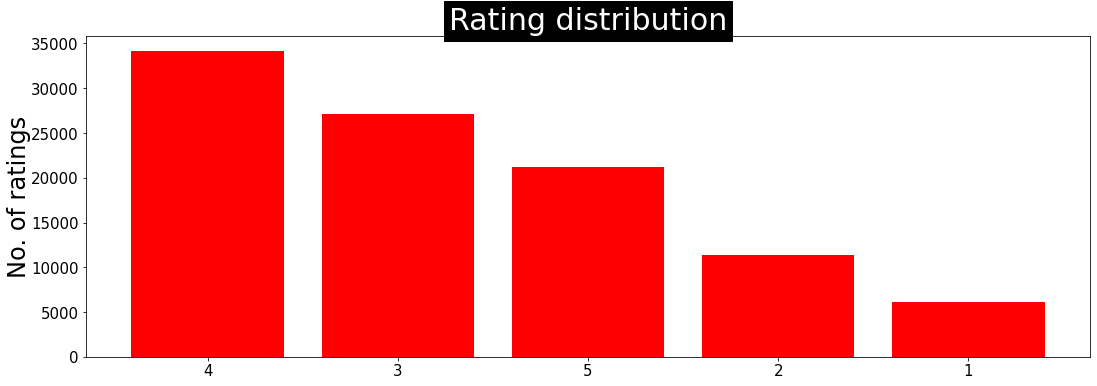

In [25]:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [genre[1] for genre in ratings_count_list]
x_axis = [i for i in range(len(ratings_count_list))]
x_label = [r[0] for r in ratings_count_list]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of ratings", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Rating distribution",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

### Average rating per user

In [26]:
users_avg_ratings =  movie_data_ratings_data.groupby('user_id')['rating'].mean().reset_index()
users_avg_ratings.sort_values(by=['rating'], ascending=False).head()

,user_id,rating
848,849,4.869565
687,688,4.833333
506,507,4.724138
627,628,4.703704
927,928,4.687500


### Average rating per movie for popularity 

In [34]:
users_avg_ratings =  movie_data_ratings_data.groupby('movie title')['rating'].mean().reset_index()
users_avg_ratings.sort_values(by=['rating'], ascending=False).head(n=20)

,movie title,rating
1472,They Made Me a Criminal (1939),5.000000
944,Marlene Dietrich: Shadow and Light (1996),5.000000
1273,"Saint of Fort Washington, The (1993)",5.000000
1359,Someone Else's America (1995),5.000000
1387,Star Kid (1997),5.000000
633,"Great Day in Harlem, A (1994)",5.000000
30,Aiqing wansui (1994),5.000000
1277,Santa with Muscles (1996),5.000000
1172,Prefontaine (1997),5.000000
462,Entertaining Angels: The Dorothy Day Story (1996),5.000000


In [202]:
def calculate_evaluate_single_user(predictions,R,user_id):
    rated_movies = []
    for j in range(num_movies):
        if (user_id,j) in R:
            rated_movies.append([j,R[(user_id,j)], predictions.loc[user_id,j]])
    
    if not rated_movies:
        return None
    sorted_prediction_movies = sorted(rated_movies, key = lambda x: x[2])
    sorted_prediction_movies.reverse()
    sorted_rated_movies = sorted(rated_movies, key = lambda x: x[1])
    sorted_rated_movies.reverse()
#     print(user_id)
#     print([[sorted_prediction_movies[i][1], sorted_rated_movies[i][1]] for i in range(len(sorted_prediction_movies))])
    MRR_5_len = min(5, len(rated_movies))
    MRR_10_len = min(10, len(rated_movies))
    MRR_5_rating = None
    MRR_10_rating = None
    DCG_5 = 0
    IDCG_5 = 0
    DCG_10 = 0
    IDCG_10 = 0
    for i in range(MRR_10_len): 
        if sorted_prediction_movies[i][1] >= 3 and i < MRR_5_len and MRR_5_rating is None:
            MRR_5_rating = 1 / (i + 1)
        if sorted_prediction_movies[i][1] >= 3 and MRR_10_rating is None:
            MRR_10_rating = 1 / (i + 1)
        
        if i < MRR_5_len:
            DCG_5 += sorted_prediction_movies[i][1] / math.log2(i + 2)
            IDCG_5 += sorted_rated_movies[i][1] / math.log2(i + 2)
        DCG_10 += sorted_prediction_movies[i][1] / math.log2(i + 2)
        IDCG_10 += sorted_rated_movies[i][1] / math.log2(i + 2)
    
    if MRR_5_rating is None:
        MRR_5_rating = 0
    if MRR_10_rating is None: 
        MRR_10_rating = 0
    return {'nDCG_10': DCG_10 / IDCG_10,'nDCG_5': DCG_5 / IDCG_5, 'MRR_5': MRR_5_rating, 'MRR_10': MRR_10_rating }
    



In [204]:
def evaluate_all_users(predictions,R):
    evaluations = {'nDCG_10': 0, 'nDCG_5': 0, 'MRR_5': 0,'MRR_10': 0}
    user_not_participated = 0
    for user_id in range(num_users):
        user_res = calculate_evaluate_single_user(predictions, R, user_id)
#         print(user_res)
        if user_res:
            evaluations['MRR_5'] += user_res['MRR_5']
            evaluations['MRR_10'] += user_res['MRR_10']        
            evaluations['nDCG_5'] += user_res['nDCG_5']
            evaluations['nDCG_10'] += user_res['nDCG_10']
        else: 
            user_not_participated+1
#     print
    num_of_users_participated = num_users - user_not_participated 
    for eval in evaluations.keys():
        evaluations[eval] = evaluations[eval] / num_of_users_participated
    return evaluations


{'nDCG_10': 0.5907365429554023,
 'nDCG_5': 0.5696906774304117,
 'MRR_5': 0.6508483563096501,
 'MRR_10': 0.6510250972074937}

### Average rating per movie

In [28]:
# users_avg_ratings =  movie_data_ratings_data.groupby(['movie title', 'movie_id'])['rating'].mean().reset_index()
users_avg_ratings =  movie_data_ratings_data.groupby(['movie title', 'movie_id'])['rating'].agg(['mean', 'count']).reset_index()
# indeices = users_avg_ratings.sort_values(by=['mean'], ascending=False)['count'] > 30
indices = users_avg_ratings['count'] > 100
popular_movies = users_avg_ratings[indices].sort_values(by=['mean'], ascending=False).head(n=20)['movie_id']
len(popular_movies)
# users_avg_ratings.sort_values(by=['rating'], ascending=False).head(n=20)

20

In [251]:
# For question 2
def results_to_average_training_results(results, folds):
    training_errors =[]
    for i in range(folds):
        training_errors.append([x[1] for x in results[i+1]['training_errors']])
    return [np.mean(k) for k in zip(*training_errors)]


In [249]:
ttt = {1: {'training_errors': [[0, 4], [1, 5], [2, 6],  [2, 99]]}, 2: {'training_errors': [[0, 1], [1, 1], [2, 1]]}}
results_to_training_results(ttt, 2)


[[4, 5, 6, 99], [1, 1, 1]]


[2.5, 3.0, 3.5]

# QUESTION 2

In [30]:
num_users = len(users)
num_movies = len(movies)

### QUESTION 2 - GD impl

In [31]:
def data_into_R(name):
    data= pd.read_csv(folder+name, delim_whitespace=True, header=None)
    R = {}
    for i in range(len(data)):
        R[(data.loc[i][0], data.loc[i][1])] = data.loc[i][2]
    return R

In [32]:
def calculate_rmse(U,V,R): 
    UV_T = U.dot(V.T)
    total = 0
    err = 0
    for i in range(num_users):
        for j in range(num_movies):
            t = (i, j)
            if t in R:
                total+=1
                err += (R[t] - UV_T.loc[i,j]) ** 2
    return math.sqrt(err / total)

In [326]:
def GD(alpha, K, lamnda_regularization, convergence_limit):
#     print('alpha: %f, K: %f, lamnda: %f' % (alpha, K, lamnda_regularization) )
    print('alpha: ' + str(alpha) + 'K: ' + str(K) + 'lambda: ' + str(lamnda_regularization))
    FOLD = 5
    results = {'alpha': alpha ,'lamnda_regularization': lamnda_regularization, 'K': K, 'convergence_limit': convergence_limit}
    fold_range = range(1, FOLD + 1)
    for fold in fold_range:
        U = pd.DataFrame(np.random.rand(num_users,K))
        V = pd.DataFrame(np.random.rand(num_movies,K))
        train_name = 'u%d.base' % (fold)
        test_name = 'u%d.test' % (fold)
        R = data_into_R(train_name)
        round = 0
        rmse_errors = []
        error_delta = 200
        previous_rmse = error_delta
        while error_delta > convergence_limit and round < 9:
            UV_T = U.dot(V.T)
            for i in range(1, num_users):
                for q in range(K):
                    err_user_component = 0
                    for j in range(1, num_movies):
                        if (i,j) in R:
                            e_ij = R[(i,j)] - UV_T.loc[i, j]
                            err_user_component += V.loc[j,q] * e_ij
                    U.loc[i,q] += alpha * (err_user_component - lamnda_regularization * U.loc[i,q])
#           I wasn't sure about this part, but it produced slightly better results if I adjusted 
#           the predictions before going to train the items vectors
            UV_T = U.dot(V.T)
            for movie_id in range(1, num_movies):
                for q in range(K): 
                    err_movie_component = 0
                    for user_id in range(1, num_users):
                        if (user_id,movie_id) in R:
                            e_ij = R[(user_id,movie_id)] - UV_T.loc[user_id, movie_id]
                            err_movie_component += U.loc[user_id,q] * e_ij
                    V.loc[movie_id, q] +=  alpha * (err_movie_component - lamnda_regularization * V.loc[movie_id, q])
            current_rmse = calculate_rmse(U,V, R)
            error_delta = abs(previous_rmse - current_rmse)
            previous_rmse = current_rmse
            rmse_errors.append([round, current_rmse])
            print('fold: %d round: %d RMSE %f, convergence error: %f'% (fold, round ,current_rmse, error_delta))
            round+=1
        R_test = data_into_R(test_name)
        rmse_test_result = calculate_rmse(U,V, R_test)
        print('fold: %d test RMSE %f'% (fold, rmse_test_result))
        predictions = UV_T = U.dot(V.T)
        evaluations = evaluate_all_users(predictions,R_test)
        results[fold] = {**evaluations,
                         **{'predictions': predictions, 'R_test': R_test}, 
                         **{'rmse_test_error': rmse_test_result, 
                            'training_errors': rmse_errors, 
                            'predictions': predictions}}
    rmse_test_error = 0
    nDCG_10_error = 0
    nDCG_5_error = 0
    MRR_5_error = 0
    MRR_10_error = 0
    for fold in fold_range:
        rmse_test_error += results[fold]['rmse_test_error']
        nDCG_10_error += results[fold]['nDCG_10']
        nDCG_5_error += results[fold]['nDCG_5']
        MRR_5_error += results[fold]['MRR_5']
        MRR_10_error += results[fold]['MRR_10']        
    results['rmse_test_error'] = rmse_test_error / FOLD
    results['nDCG_10'] = nDCG_10_error / FOLD
    results['nDCG_5'] = nDCG_5_error / FOLD
    results['MRR_5'] = MRR_5_error / FOLD
    results['MRR_10'] = MRR_10_error / FOLD    
    return results
            

In [262]:
'u%d.base' % (1)
# alphas = [0.00025, 0.0002, 0.0003]
# lamnda_regularizations = [0.002, 0.001, 0.005]
# Ks = [10, 20, 50]
# results = []
# for a in alphas:
#     for r in lamnda_regularizations:
#         for k in Ks:
# #             GD(alpha, K, lamnda_regularization, rounds):
#             res = GD(a,k,r,20)
#             results.append(res)
        
# results  = GD2(0.00025, 5, 0.002, 0.2)        
# results[1].keys()
# results[1].keys()

# print(results[1].keys())


AttributeError: 'list' object has no attribute 'keys'

In [149]:
x = {'a': 1}
y = {'b': 3}
{**{'a': 1}, **y}

{'a': 1, 'b': 3}

In [146]:
results['test_result']

2.403956396543721

In [83]:
my_R = data_into_R('u1.test')

calculate_user_MRR(predictions,R,user_id)

In [113]:
results[1]['predictions']


,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,1.472248,1.460568,0.880862,0.614409,1.374636,0.473906,0.984425,1.362464,0.727285,1.262694,...,1.241546,0.536224,0.784376,1.554348,1.633836,1.387547,1.080193,1.576009,1.216052,0.911078
1,2.047853,2.305502,1.428626,0.892328,1.843676,0.771354,1.475900,1.933954,1.120495,1.630442,...,1.931901,0.811051,1.162222,2.098375,2.308426,1.838520,1.447936,2.335791,1.651351,1.371919
2,1.538764,2.083765,1.411626,0.661668,1.598987,0.721098,1.002295,1.563077,0.864536,1.194782,...,1.682019,0.796667,0.849702,1.579472,1.751049,1.263680,1.205307,1.999490,1.234100,1.260222
3,1.633223,2.090844,1.114858,0.682312,1.628260,1.048174,1.244747,1.180945,1.368993,1.089536,...,1.377795,0.633625,0.762301,1.294804,1.823670,1.425611,1.240695,1.928310,1.536154,1.254572
4,1.409730,2.087947,1.218299,0.752218,1.421948,0.969822,1.323600,1.146678,1.208626,0.863199,...,1.574876,0.641914,0.845236,1.130824,1.727311,1.306528,0.987046,1.861983,1.418050,1.170568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,1.458538,1.920598,1.260094,0.637852,1.099091,0.585379,1.125007,1.492023,0.845675,1.022901,...,1.611589,0.642408,0.927710,1.482193,1.641364,1.117382,0.927130,1.799900,0.983256,1.063732
939,1.306916,1.826642,1.133030,0.778899,1.723437,0.840604,1.157037,1.141029,0.937325,1.004182,...,1.510979,0.673520,0.768017,1.188114,1.697743,1.461944,1.072044,1.766151,1.567717,1.103408
940,1.946943,2.139912,1.130781,0.822345,2.085626,1.034201,1.376622,1.464307,1.380217,1.519710,...,1.503899,0.711049,0.884241,1.721044,2.184069,1.889814,1.546852,2.155571,1.915192,1.357313
941,1.324743,1.885814,1.190614,0.421736,1.755833,0.907762,0.572908,1.101315,0.966863,1.022776,...,1.158285,0.744612,0.429743,1.161707,1.399359,1.003239,1.308593,1.758089,1.203171,1.266652


In [540]:
len(results)

2

### QUESTION 2 - ALS impl

In [437]:
def init_R2(name):
    data= pd.read_csv(folder+name, delim_whitespace=True, header=None)
    R = pd.DataFrame(np.zeros((num_users,num_movies)))   
    for i in range(len(data)):
        R.loc[data.loc[i][0], data.loc[i][1]] = data.loc[i][2]
    return R

In [310]:
def ALS(K, lamnda_regularization, convergence_limit):
    FOLD = 5
    results = {'lamnda_regularization': lamnda_regularization, 'K': K, 'convergence_limit': convergence_limit}
    fold_range = range(1, FOLD + 1)
    for fold in fold_range:
        U = pd.DataFrame(np.random.rand(num_users,K))
        V = pd.DataFrame(np.random.rand(num_movies,K))
        train_name = 'u%d.base' % (fold)
        test_name = 'u%d.test' % (fold)
        R = data_into_R(train_name)
        round = 0
        rmse_errors = []
        print('fold: %d' % fold )
        error_delta = 200
        previous_rmse = error_delta
        while error_delta > convergence_limit and round < 9:
            print('round: %d' % round )
            V_prepared = np.linalg.pinv(((V.T).dot(V) +  lamnda_regularization* np.identity(K)))
            for i in range(1, num_users):
#               Updating V_j component accoridng to the user rating
                V_j_compoenent = None
                for j in range(1, num_movies):
                        if (i,j) in R:
                            if V_j_compoenent is not None:
                                V_j_compoenent += R[(i,j)] * V.loc[j]
                            else:
                                V_j_compoenent = R[(i,j)] * V.loc[j]  
                if V_j_compoenent is not None:
                    U.loc[i] = V_j_compoenent.dot(V_prepared)
            U_prepared = np.linalg.pinv(((U.T).dot(U) +  lamnda_regularization* np.identity(K)))
            for movie_id in range(1, num_movies):
#               Updating U_j according to the user rating
                U_j_compoenent = None
                for user_id in range(1, num_users):
                        if (user_id,movie_id) in R:
                            if U_j_compoenent is not None:
                                U_j_compoenent += R[(user_id,movie_id)] * U.loc[user_id]                               
                            else:
                                U_j_compoenent = R[(user_id,movie_id)] * U.loc[user_id]                               

                if U_j_compoenent is not None:
                    V.loc[movie_id] = U_j_compoenent.dot(U_prepared)
            current_rmse = calculate_rmse(U,V, R)
            error_delta = abs(previous_rmse - current_rmse)
            previous_rmse = current_rmse
            rmse_errors.append([round, current_rmse])
            print('fold: %d round: %d RMSE %f'% (fold, round ,current_rmse))
            round+=1
        R_test = data_into_R(test_name)
        rmse_test_result = calculate_rmse(U,V, R_test)
        predictions = UV_T = U.dot(V.T)
        print('fold: %d test RMSE %f'% (fold, rmse_test_result))
        evaluations = evaluate_all_users(predictions,R_test)
        results[fold] = {**evaluations,
                         **{'predictions': predictions, 'R_test': R_test}, 
                         **{'rmse_test_error': rmse_test_result, 
                            'training_errors': rmse_errors, 
                            'predictions': predictions}}
    rmse_test_error = 0
    nDCG_10_error = 0
    nDCG_5_error = 0
    MRR_5_error = 0
    MRR_10_error = 0
    for fold in fold_range:
        rmse_test_error += results[fold]['rmse_test_error']
        nDCG_10_error += results[fold]['nDCG_10']
        nDCG_5_error += results[fold]['nDCG_5']
        MRR_5_error += results[fold]['MRR_5']
        MRR_10_error += results[fold]['MRR_10']        
    results['rmse_test_error'] = rmse_test_error / FOLD
    results['nDCG_10'] = nDCG_10_error / FOLD
    results['nDCG_5'] = nDCG_5_error / FOLD
    results['MRR_5'] = MRR_5_error / FOLD
    results['MRR_10'] = MRR_10_error / FOLD       
    return results
            

In [311]:
summary_table = pd.DataFrame(columns=['alg', 'K', 'lambda', 'alpha','rmse', 'nDCG_10','MRR_10','nDCG_5', 'MRR_5', 'convergence_limit'])

In [324]:
alphas = [0.00025, 0.0001]
lamnda_regularizations = [0.002, 0.003]
Ks = [20]


In [327]:
# GDs

# GDss = []
for a in alphas:
    for r in lamnda_regularizations:
        for k in Ks:
            gd_result = GD(a, k, r, 0.02)
            GDs.append(gd_result)
            r= {'alg': 'gradient descent', 
                'lambda': r,
                'K': k,
                'alpha': a,
                'rmse': gd_result['rmse_test_error'],
                'nDCG_10': gd_result['nDCG_10'],
                'MRR_10': gd_result['MRR_10'],
                'nDCG_5': gd_result['nDCG_5'],
                'MRR_5': gd_result['MRR_5'],
                'convergence_limit': 0.02}
            print(r)
            summary_table = summary_table.append(r,ignore_index=True)
            summary_table.to_csv('temp_results.csv')



alpha: 0.00025K: 20lambda: 0.002
fold: 1 round: 0 RMSE 1.653136, convergence error: 198.346864
fold: 1 round: 1 RMSE 1.465753, convergence error: 0.187383
fold: 1 round: 2 RMSE 1.359147, convergence error: 0.106606
fold: 1 round: 3 RMSE 1.291283, convergence error: 0.067864
fold: 1 round: 4 RMSE 1.244325, convergence error: 0.046958
fold: 1 round: 5 RMSE 1.209688, convergence error: 0.034637
fold: 1 round: 6 RMSE 1.182853, convergence error: 0.026835
fold: 1 round: 7 RMSE 1.161259, convergence error: 0.021593
fold: 1 round: 8 RMSE 1.143365, convergence error: 0.017894
fold: 1 test RMSE 1.220390
fold: 2 round: 0 RMSE 1.664601, convergence error: 198.335399
fold: 2 round: 1 RMSE 1.471604, convergence error: 0.192997
fold: 2 round: 2 RMSE 1.363962, convergence error: 0.107642
fold: 2 round: 3 RMSE 1.296108, convergence error: 0.067853
fold: 2 round: 4 RMSE 1.249319, convergence error: 0.046789
fold: 2 round: 5 RMSE 1.214825, convergence error: 0.034494
fold: 2 round: 6 RMSE 1.188086, conv

KeyboardInterrupt: 

In [ ]:
ALs = []
for r in lamnda_regularizations:
    for k in Ks:
        als_result = ALS(k, r, 0.02)
        r = {'alg': 'als', 
             'K': k,
             'lambda': r,
             'rmse': als_result['rmse_test_error'],
             'nDCG_10': als_result['nDCG_10'],
             'MRR_10': als_result['MRR_10'],
             'nDCG_5': als_result['nDCG_5'],
             'MRR_5': als_result['MRR_5'],
             'convergence_limit': 0.02
             }
        print(r)
        summary_table = summary_table.append(r,ignore_index=True)

## QUESTION 2 - Summary 

Bellow you may see the findings:
1. A table descriving all the alogirhtms, the parametesr and their results sorted by RMSE error 
2. Plot of the training erros of the different algorithms 


In [350]:
GDs[0].keys()

dict_keys(['alpha', 'lamnda_regularization', 'K', 'convergence_limit', 1, 2, 3, 4, 5, 'rmse_test_error', 'nDCG_10', 'nDCG_5', 'MRR_5', 'MRR_10'])

<Figure size 432x288 with 0 Axes>

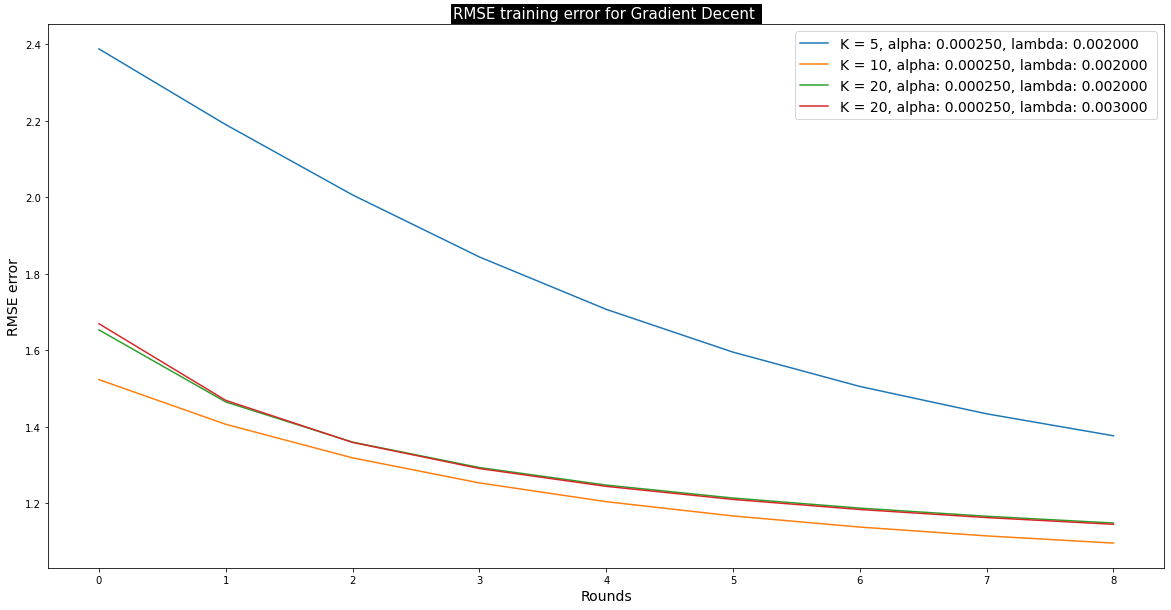

In [370]:

fig = plt.figure()
plt.figure(figsize=(20,10))
plt.title("RMSE training error for Gradient Decent ",bbox={'facecolor':'k', 'pad':2},color='w',fontsize = 15)
plt.xlabel("Rounds", fontsize=14)
plt.ylabel("RMSE error", fontsize=14)
for i in range(len(GDs)):   
    errors = results_to_average_training_results(GDs[i], 5)
    x = range(len(errors))
    y = errors
    label = 'K = %d, alpha: %f, lambda: %f ' % (GDs[i]['K'], GDs[i]['alpha'], GDs[i]['lamnda_regularization'])
    plt.errorbar(x,y , label=label)
    plt.legend(loc='upper right', prop={'size': 14})
    



In [528]:
df = pd.DataFrame([[0,0,0,0], [1, 1, 1, 1]])
df = df.T
s = pd.Series([3,5])

a.dot(b)

array([16,  6])

In [533]:
df = pd.DataFrame(a)
s = pd.Series(b)

df.values.dot(s.values)


array([16,  6])

In [305]:
matrix1 = [(1, 1),
          (0, 2),
          (0, 2)];

 

matrix2 = [(2, 0),

           (1, 1),
           (1, 1)           

           ];

# Data loaded into pandas DataFrames

dataFrame1 = pd.DataFrame(data=matrix1);

dataFrame2 = pd.DataFrame(data=matrix2);

 

print("Matrix1:");

print(dataFrame1);

print("Dimension:");

print(dataFrame1.shape);

 

print("Matrix2:");

print(dataFrame2);

print("Dimension:");

print(dataFrame2.shape);

 

# Multiply the matrices: Matrix1 and Matrix2



Matrix1:
   0  1
0  1  1
1  0  2
2  0  2
Dimension:
(3, 2)
Matrix2:
   0  1
0  2  0
1  1  1
2  1  1
Dimension:
(3, 2)


In [306]:
result = dataFrame1.dot(dataFrame2.T);

result

,0,1,2
0,2,2,2
1,0,2,2
2,0,2,2
